# Assignment 1: Approximation of mathematical functions

In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating $\log$

Function $\log$ is defined on positive real numbers: $\log(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The Taylor series for $\log$ has [the following form](https://en.wikipedia.org/wiki/Logarithm):

\begin{align}\log (x)  &= \frac{(x-1)^1}{1} - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \cdots \\
&= \sum_{n=1}^\infty (-1)^{n+1}\frac{(x-1)^n}{n}
\end{align}

and converges to $\log$ for $0 < x < 2$. 

1. Implement `log1` that approximates $\log(x),\,0 < x < 2$. 



In [ ]:
def log1(x, n):
  ans=0
  for n in range(1,n+1):
    ans +=((-1)**(n+1))*(((x-1)**n)/n)
  return ans  



 2. * Plot  `math.log` and `log1` for $0.25 ≤ x ≤ 4$ for $n=1,2,4,8$.   
    * Plot the **absolute** error of `log1` compared to `math.log` on $0.01 ≤ x ≤ 1$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 

   


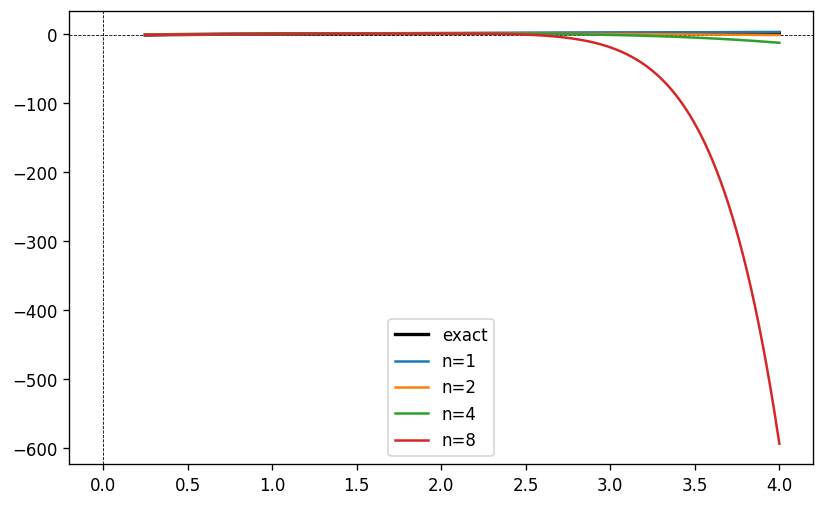

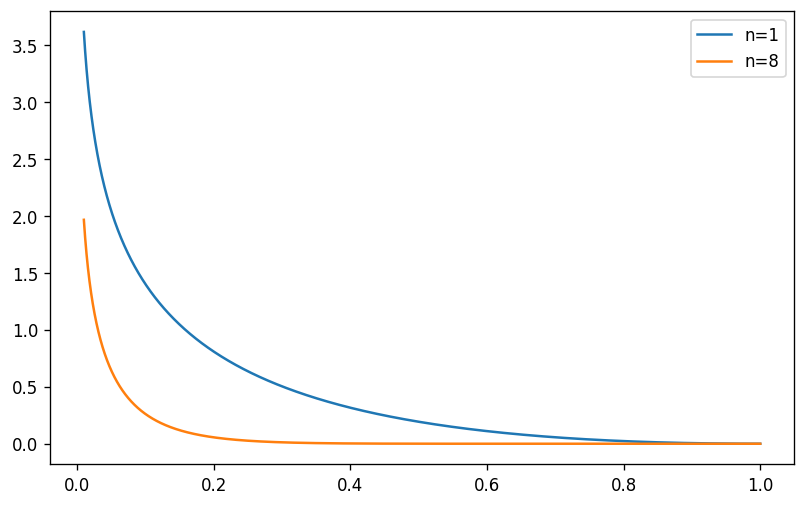

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fun(f, g, min=0.25, max=4, logn_from=0, logn_till=4):
   # Create a vector of 10000 values equally spaced between min and max.
   x=numpy.linspace(min, max, 10000)
    # Prepare a canvas for the graph.
   plt.figure(figsize=(8, 5)).set_dpi(120)
    # Plot axes x=0 and y=0, dashed.
   plt.axhline(-1, ls='--', c='black', lw=0.5)
   plt.axvline(0, ls='--', c='black', lw=0.5)
    # Plot the 'exact' function.
   plt.plot(x, [g(z) for z in x], label="exact", c='black', lw=2)
    # For each number of Taylor series terms ...
   for logn in range(logn_from, logn_till):
       n = 2**logn
       y = [f(x_, n) for x_ in x]
       # Plot the Taylor approximation
       plt.plot(x, y, label=f"n={n}")
  # Display the legend
   plt.legend()
   plt.show()

plot_fun(log1, math.log, min=0.25, max=4)

def err(f, g, min=0.01, max=1):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 5)).set_dpi(120)
  y = [abs(g(x_)-f(x_, 1)) for x_ in x]
  plt.plot(x, y, label=f"n={1}")
  y=[abs(g(x_)-f(x_, 8)) for x_ in x]
  plt.plot(x, y, label=f"n={8}")
  plt.legend()
  plt.show()

err(log1, math.log, min=0.01, max=1)


3. Implement `log2` that approximates $\log(x),\,0 < x < \infty$. _Hint:_ $\log (e^N\cdot x) = N + \log x$.


In [ ]:
def log2(x,n):
  N= 0
  while x>= 2:
    N +=1
    x = x/math.e
  ans = N + log1(x,n)
  return ans


 4. * Plot  `math.log` and `log2` for $0.1 ≤ x ≤ 100$ for $n=1,2,4,8$.   
    * Plot the **relative** error of `log2` compared to `math.log` on $0.1 ≤ x ≤ 100$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 



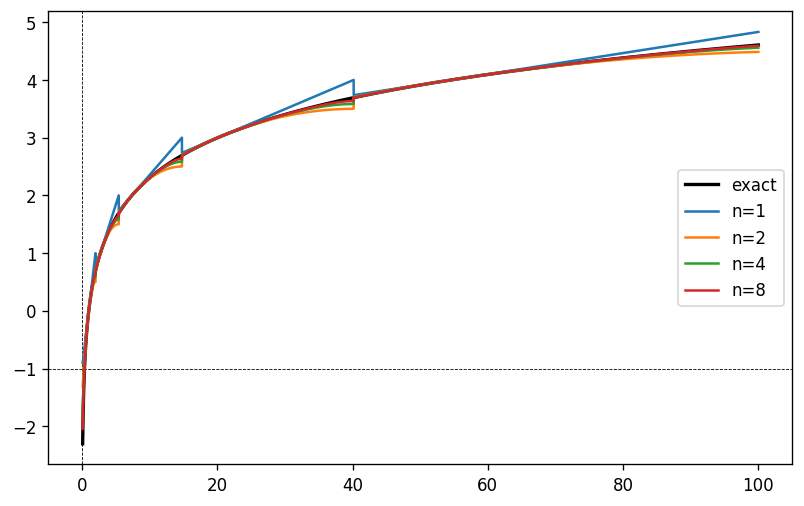

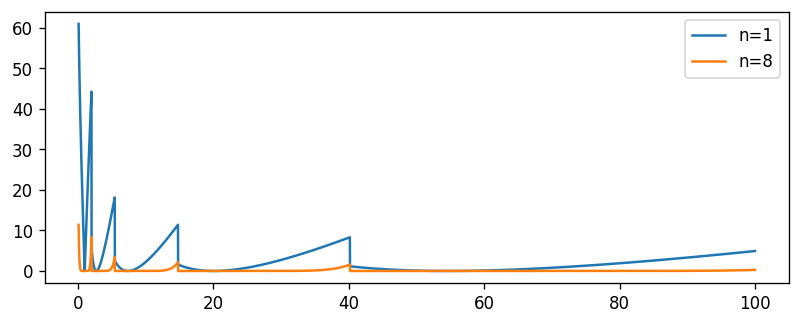

In [ ]:
plot_fun(log2, math.log, min=0.1, max=100)

def relativerr(f, g, min=0.1, max=100):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  y = [(abs(f(x_, 1)-g(x_)))/abs(g(x_)) *100 for x_ in x]
  plt.plot(x, y, label=f"n={1}")
  y=[(abs(f(x_, 8)-g(x_)))/abs(g(x_)) *100 for x_ in x]
  plt.plot(x, y, label=f"n={8}")
  plt.legend()
  plt.show()

relativerr(log2, math.log, min=0.1, max=100)

5. What are the maximum absolute and relative errors of `log1` compared to `log2` on interval $0.25 ≤ x ≤ 1.75$? 

No handles with labels found to put in legend.


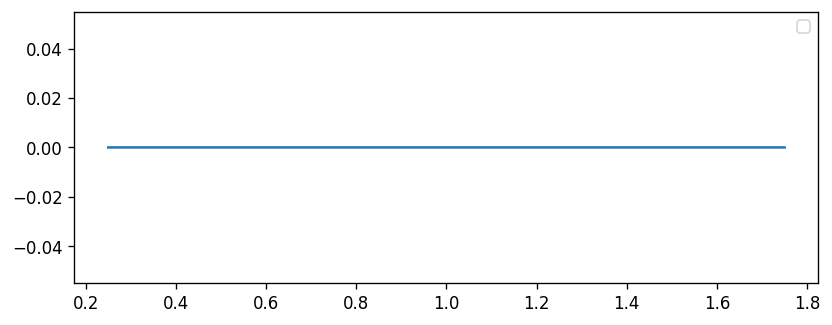

No handles with labels found to put in legend.


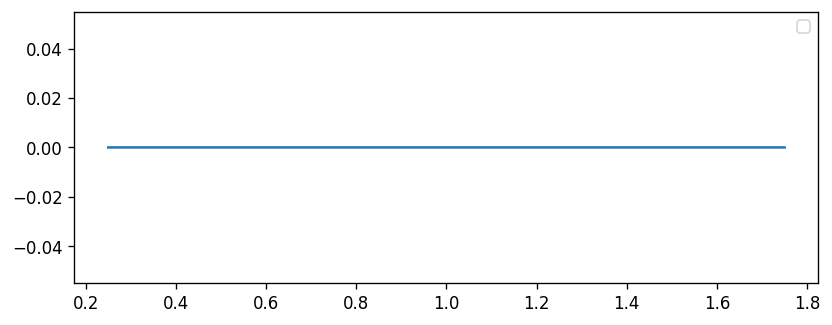

In [ ]:
def logrelativerr(f, g, min=0.25, max=1.75):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  y = [((abs(f(x_, 8)-g(x_,8)))/abs(g(x_,8)) *100) for x_ in x]
  plt.plot(x, y)
  plt.legend()
  plt.show()

logrelativerr(log1, log2, min=0.25, max=1.75)

def logabserr(f, g, min=0.25, max=1.75):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  y = [abs(g(x_,8)-f(x_, 8)) for x_ in x]
  plt.plot(x, y)
  plt.legend()
  plt.show()

logabserr(log1, log2, min=0.25, max=1.75)
#According to the graph it can be seen that the absolute and relative errors are always 0.00 , so this is also the maximum errors

## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `logfact`  from [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF) with `math.log` and `math.exp`, to implement the [multinomial coefficients](https://en.wikipedia.org/wiki/Multinomial_theorem#Multinomial_coefficients) for $m=3$ on the log scale:

$$\binom{n}{k_1,k_2,...,k_m} = \frac{n!}{k_1! k_2! \cdot\cdot\cdot k_m!}$$


In [ ]:
def logfact(n):
  logf = 0
  for i in range(n):
    logf += math.log(i + 1)
  return logf

def multinom(n, k1, k2, k3):
  return round(math.exp(logfact(n)-logfact(k1)-logfact(k2)-logfact(k3)))
 

2. Use `log2` from question 1 and `exp2` from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K) to implement the approximate computation of the multinomial coefficients for $m=3$:


In [ ]:
def log2(x,n):
  N= 0
  while x>= 2:
    N +=1
    x = x/math.e
  ans = N + log1(x,n)
  return ans

def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v  
    
e = 2.7182818284590455
def exp2(x, n):
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

def log2fact(n):
  logf = 0
  for i in range(n):
    logf += log2(i + 1, 10000 )
  return logf

def mymultinom(n, k1, k2, k3):
  return round(exp2(log2fact(n)-log2fact(k1)-log2fact(k2)-log2fact(k3), 8))


3. Compute $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$. Compare the running times of `multinomial coefficients` using `log2` and `exp2` vs. `math.log` and `math.exp`.


In [ ]:
 %time print("log2 and exp2= %d" % mymultinom(10, 2, 2, 6))


log2 and exp2= 1260
CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 138 ms


In [ ]:
%time print("math.log and math.exp= %d" % multinom(10, 2, 2, 6))

math.log and math.exp= 1260
CPU times: user 710 µs, sys: 0 ns, total: 710 µs
Wall time: 716 µs


In [ ]:
%time print("log2 and exp2= %d" % mymultinom(150, 100, 25, 25))

log2 and exp2= 2544476232332096006952275767216454529725696007846494208
CPU times: user 1.99 s, sys: 0 ns, total: 1.99 s
Wall time: 2 s


In [ ]:
%time print("math.log and math.exp= %d" % multinom(150, 100, 25, 25))

math.log and math.exp= 2544476232379045785963458409835886714436879363285712896
CPU times: user 173 µs, sys: 0 ns, total: 173 µs
Wall time: 178 µs


4. What are the absolute and relative error of `multinomial coefficients` for each combination of arguments — $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$?


In [ ]:
abserr =abs(mymultinom(10, 2, 2, 6)-multinom(10, 2, 2, 6))
print("the absolute error of (10, 2, 2, 6) is %d" % abserr)

abserr1=abs(multinom(150, 100, 25, 25)-mymultinom(150, 100, 25, 25))
print("the absolute error of (150, 100, 25, 25) is %d" % abserr1)

the absolute error of (10, 2, 2, 6) is 0
the absolute error of (150, 100, 25, 25) is 46949779011182642619432184711183355439218688


In [ ]:
rela_err= abs(mymultinom(10, 2, 2, 6)-multinom(10, 2, 2, 6)) / abs(multinom(10, 2, 2, 6)) *100
print("the relative error of (10, 2, 2, 6) is %d" % rela_err)

rela_err1= abs(mymultinom(150, 100, 25, 25)-multinom(150, 100, 25, 25)) /abs(multinom(150, 100, 25, 25)) *100
print("the relative error of (150, 100, 25, 25) is %d" % rela_err1)

the relative error of (10, 2, 2, 6) is 0
the relative error of (150, 100, 25, 25) is 0


5. For which $n$(number of Taylor series terms) the absolute difference between the *relative errors* of $\binom{1000}{900, 50,50}$ computed for `n` and `n+1` is smaller than 0.1%? Use the approximation from Q2.2 

In [ ]:
def newlog2fact(n,k):
  logf = 0
  for i in range(n):
    logf += log2(i + 1, k )
  return logf

def mymultinom2(n, k1, k2, k3):
  for k in range(1,10000):
    first= round(exp2(newlog2fact(n,k)-newlog2fact(k1,k)-newlog2fact(k2,k)-newlog2fact(k3,k), 8))
    second=round(exp2(newlog2fact(n,k +1)-newlog2fact(k1,k+1)-newlog2fact(k2,k+1)-newlog2fact(k3,k+1), 8))
    relat_erro1= abs(first-multinom(1000, 900, 50, 50)) /abs(multinom(1000, 900, 50, 50)) *100
    relat_erro2= abs(second-multinom(1000, 900, 50, 50)) /abs(multinom(1000, 900, 50, 50)) *100
    if abs(relat_erro1-relat_erro2) < 0.1:
      return k

mymultinom2(1000, 900, 50, 50)



13